In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
# import dependencies
import logging
import numpy as np

import htfa_torch.tfa as TFA
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s',
                            datefmt='%m/%d/%Y %H:%M:%S',
                            level=logging.INFO)

In [4]:
tfa = TFA.TopographicalFactorAnalysis('data/pieman_data/sub-001-task-intact1.nii', num_factors=25)

In [5]:
prior_sample = tfa.sample()

logging.info('Prior Reconstruction Error (Frobenius Norm): %.8e', np.linalg.norm(
    prior_sample['Y0'].value.data.cpu().numpy() - tfa.voxel_activations.numpy()
))

prior_sample

del prior_sample

03/30/2018 13:12:17 Prior Reconstruction Error (Frobenius Norm): 5.34592139e+03


In [6]:
losses = tfa.train(num_steps=200, log_level=logging.INFO, batch_size=tfa.voxel_activations.shape[0], num_particles=4, use_cuda=True)

03/30/2018 13:12:17 [Epoch 1] (236ms) Posterior free-energy 9.21416397e+09
03/30/2018 13:12:17 [Epoch 2] (247ms) Posterior free-energy 9.43707853e+09
03/30/2018 13:12:17 [Epoch 3] (246ms) Posterior free-energy 6.77325005e+09
03/30/2018 13:12:18 [Epoch 4] (222ms) Posterior free-energy 7.29646694e+09
03/30/2018 13:12:18 [Epoch 5] (245ms) Posterior free-energy 5.03746918e+09
03/30/2018 13:12:18 [Epoch 6] (245ms) Posterior free-energy 4.90637210e+09
03/30/2018 13:12:18 [Epoch 7] (261ms) Posterior free-energy 4.09199053e+09
03/30/2018 13:12:19 [Epoch 8] (276ms) Posterior free-energy 3.11918771e+09
03/30/2018 13:12:19 [Epoch 9] (264ms) Posterior free-energy 2.80314112e+09
03/30/2018 13:12:19 [Epoch 10] (270ms) Posterior free-energy 3.43167258e+09
03/30/2018 13:12:20 [Epoch 11] (263ms) Posterior free-energy 2.74017664e+09
03/30/2018 13:12:20 [Epoch 12] (251ms) Posterior free-energy 2.35199846e+09
03/30/2018 13:12:20 [Epoch 13] (224ms) Posterior free-energy 2.21223501e+09
03/30/2018 13:12:20 [

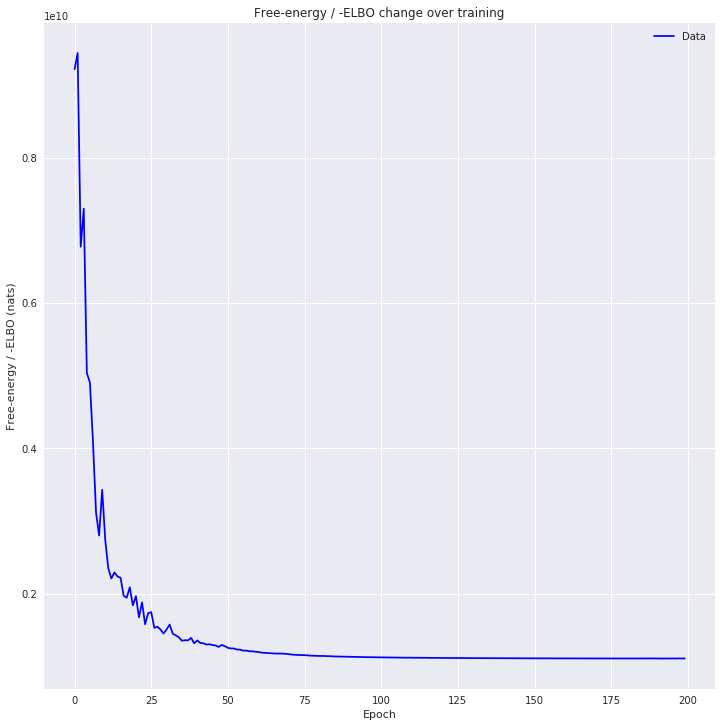

03/30/2018 13:13:06 Reconstruction Error (Frobenius Norm): 4.79637646e+03
03/30/2018 13:13:06 {'weights': array([[-0.13612738,  1.8493122 ,  0.678325  , ...,  0.5658725 ,
        -1.7775304 ,  0.31507605],
       [-0.9764824 ,  0.8601848 ,  1.7872121 , ...,  0.02895046,
        -0.02741168,  1.2023407 ],
       [-1.7222815 ,  0.26103437,  1.6214889 , ..., -1.356598  ,
         0.6925485 ,  1.6402147 ],
       ...,
       [-3.2965775 ,  0.20878091,  0.908553  , ..., -0.46825933,
         0.24633805,  0.2004826 ],
       [-3.814589  ,  0.12507625,  2.1407263 , ..., -0.42912588,
        -0.37736064, -0.5982893 ],
       [-5.072412  ,  0.6919661 ,  3.7707818 , ...,  1.810252  ,
         0.31384414, -2.0167842 ]], dtype=float32), 'factors': array([[0.00444499, 0.00472194, 0.00498725, ..., 0.00410736, 0.00456971,
        0.00479849],
       [0.00164244, 0.00160869, 0.00156508, ..., 0.6915694 , 0.7147308 ,
        0.6773438 ],
       [0.00100765, 0.00100797, 0.0010028 , ..., 0.05711653, 0.059

In [7]:
utils.plot_losses(losses)

results = tfa.results()
logging.info(results)

In [8]:
posterior_sample = tfa.sample(posterior_predictive=True)

logging.info('Prior Reconstruction Error (Frobenius Norm): %.8e', np.linalg.norm(
    posterior_sample['Y0'].value.data.cpu().numpy() - tfa.voxel_activations.numpy()
))

posterior_sample

03/30/2018 13:13:08 Prior Reconstruction Error (Frobenius Norm): 4.82733447e+03


Trace{'Weights0': Normal([torch.FloatTensor of size 1x300x25]), 'FactorCenters0': Normal([torch.FloatTensor of size 1x25x3]), 'FactorLogWidths0': Normal([torch.FloatTensor of size 1x25]), 'Y0': Normal([torch.FloatTensor of size 1x300x94537])}

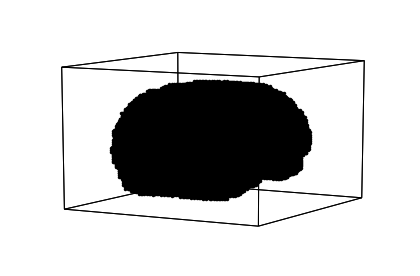

03/30/2018 13:13:08 Reconstruction Error (Frobenius Norm): 4.79632764e+03
/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1291: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


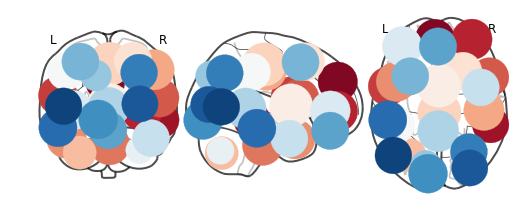

In [9]:
tfa.plot_voxels()
tfa.plot_factor_centers()

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)


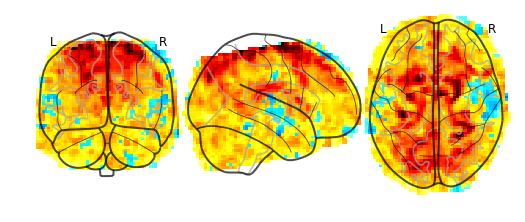

03/30/2018 13:13:09 Reconstruction Error (Frobenius Norm): 4.79595215e+03


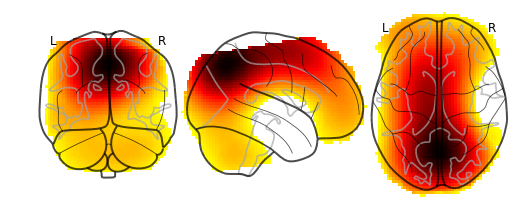

In [10]:
tfa.plot_original_brain()
tfa.plot_reconstruction()

03/30/2018 13:13:22 Reconstruction Error (Frobenius Norm): 4.79623535e+03
/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1291: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


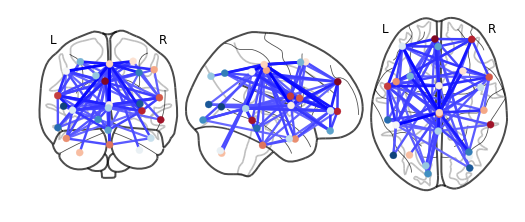

In [11]:
tfa.plot_connectome()